## Interesting links

In [32]:
#Link1:
#https://medium.com/@ThiyaneshwaranG/top2vec-for-topic-modeling-and-semantic-similarity-and-search-77db82dda7d3
#https://github.com/thiyanesh17/KnowledgeSharing/blob/main/Top2vec__iIdentifying_Abstract_Topics_NLP.ipynb


#Link2:
#https://medium.com/@janhavil1202/understanding-topic-modeling-with-top2vec-cdf58bcd6c09


## Import libraries

In [33]:
""" 
#https://pypi.org/project/top2vec/
pipenv install top2vec
pipenv install top2vec[sentence_transformers]
pipenv install top2vec[sentence_encoders] #if you get error restart kernel and run again
"""

' \n#https://pypi.org/project/top2vec/\npipenv install top2vec\npipenv install top2vec[sentence_transformers]\npipenv install top2vec[sentence_encoders] #if you get error restart kernel and run again\n'

In [1]:
from top2vec import Top2Vec
import pandas as pd
import re, string 


## Read data

In [35]:
'''
Presidential Inaugural Addresses
Context:
Every Presidency starts off with the Inaugural Address. This defines the course for the next 4 years. 
How do the length, word usage, lexical diversity change from President to President? 
https://www.kaggle.com/datasets/adhok93/presidentialaddress?resource=download
'''

'\nPresidential Inaugural Addresses\nContext:\nEvery Presidency starts off with the Inaugural Address. This defines the course for the next 4 years. \nHow do the length, word usage, lexical diversity change from President to President? \nhttps://www.kaggle.com/datasets/adhok93/presidentialaddress?resource=download\n'

In [2]:
file_name='inaug_speeches.csv'

df = pd.read_csv('input/' + file_name, encoding= 'latin1')
df.head()

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again cal...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CA...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to ..."


## Define models

In [3]:
#models comes from two diffrent links mentioned above

model1='distiluse-base-multilingual-cased'

model2='universal-sentence-encoder'

## Preprocessing

In [4]:
def clean_text(text):

  # Convert to lowercase
  text = text.lower()
  # Removing text in square brackets
  text = re.sub(r'\[.*?\]', ' ', text)
  # Removing punctuation
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  # Removing words containing digits
  text = re.sub('\w*\d\w*', ' ', text)
  # Removing special character '�'
  text = re.sub('�', ' ', text)
  
  return text


# Function to apply cleaning to each text in the DataFrame
def cleaned_text(x):
    result = clean_text(x)
    return result

In [5]:
# Apply the function
df["text"] = df["text"].apply(cleaned_text)

df.head(5)

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again cal...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797",when it was first perceived in ...
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",friends and fellow citizens ca...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805",proceeding fellow citizens to ...


In [6]:
# Crop the dataframe
df = df[['Name','text']]
df.head()

,Name,text
0,George Washington,fellow citizens of the senate and o...
1,George Washington,fellow citizens i am again cal...
2,John Adams,when it was first perceived in ...
3,Thomas Jefferson,friends and fellow citizens ca...
4,Thomas Jefferson,proceeding fellow citizens to ...


## Train model

In [41]:
umap_args = {'n_neighbors': 10,
             'n_components': 5,
             'metric': 'cosine',
             "random_state": 42}

In [42]:
hdbscan_args = {'min_cluster_size': 10,
                'min_samples':5,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

In [7]:
model = Top2Vec(   documents= df.text.values, #chooses a specific column in the df
                   #speed='deep-learn', 
                   workers=4, 
                   #min_count = 0, 
                   embedding_model=model2
                   #umap_args = umap_args, 
                   #hdbscan_args = hdbscan_args
                )

2023-12-29 21:24:22,038 - top2vec - INFO - Pre-processing documents for training
c:\Users\Martin\.virtualenvs\venv_top2vec-TybEn79b\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-12-29 21:24:22,271 - top2vec - INFO - Downloading universal-sentence-encoder model
2023-12-29 21:25:01,667 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-29 21:25:02,409 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-29 21:25:08,337 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-29 21:25:08,351 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


## Results

In [8]:
# Number of topics
model.get_num_topics()

2

In [9]:
# Keywords for each topics
model.topic_words

array([['constitutional', 'citizens', 'republic', 'oath', 'countrymen',
        'democracy', 'constitution', 'citizen', 'nation', 'prosperity',
        'against', 'honor', 'civil', 'respect', 'equal', 'without',
        'freedom', 'government', 'congress', 'powers', 'liberty',
        'rights', 'principles', 'who', 'whose', 'ourselves', 'national',
        'necessary', 'governments', 'shall', 'duty', 'states',
        'authority', 'principle', 'even', 'nor', 'among', 'executive',
        'individual', 'free', 'administration', 'each', 'under', 'every',
        'nations', 'both', 'federal', 'laws', 'between', 'which'],
       ['freedom', 'nation', 'prosperity', 'citizens', 'countrymen',
        'democracy', 'liberty', 'citizen', 'republic', 'oath', 'equal',
        'nations', 'peace', 'constitutional', 'against', 'without',
        'ourselves', 'free', 'honor', 'constitution', 'respect',
        'beyond', 'president', 'national', 'who', 'america', 'necessary',
        'individual', 'str

In [10]:
""" # Reduce topics if needed
model.hierarchical_topic_reduction(num_topics=10) """

' # Reduce topics if needed\nmodel.hierarchical_topic_reduction(num_topics=10) '

**Word Cloud**

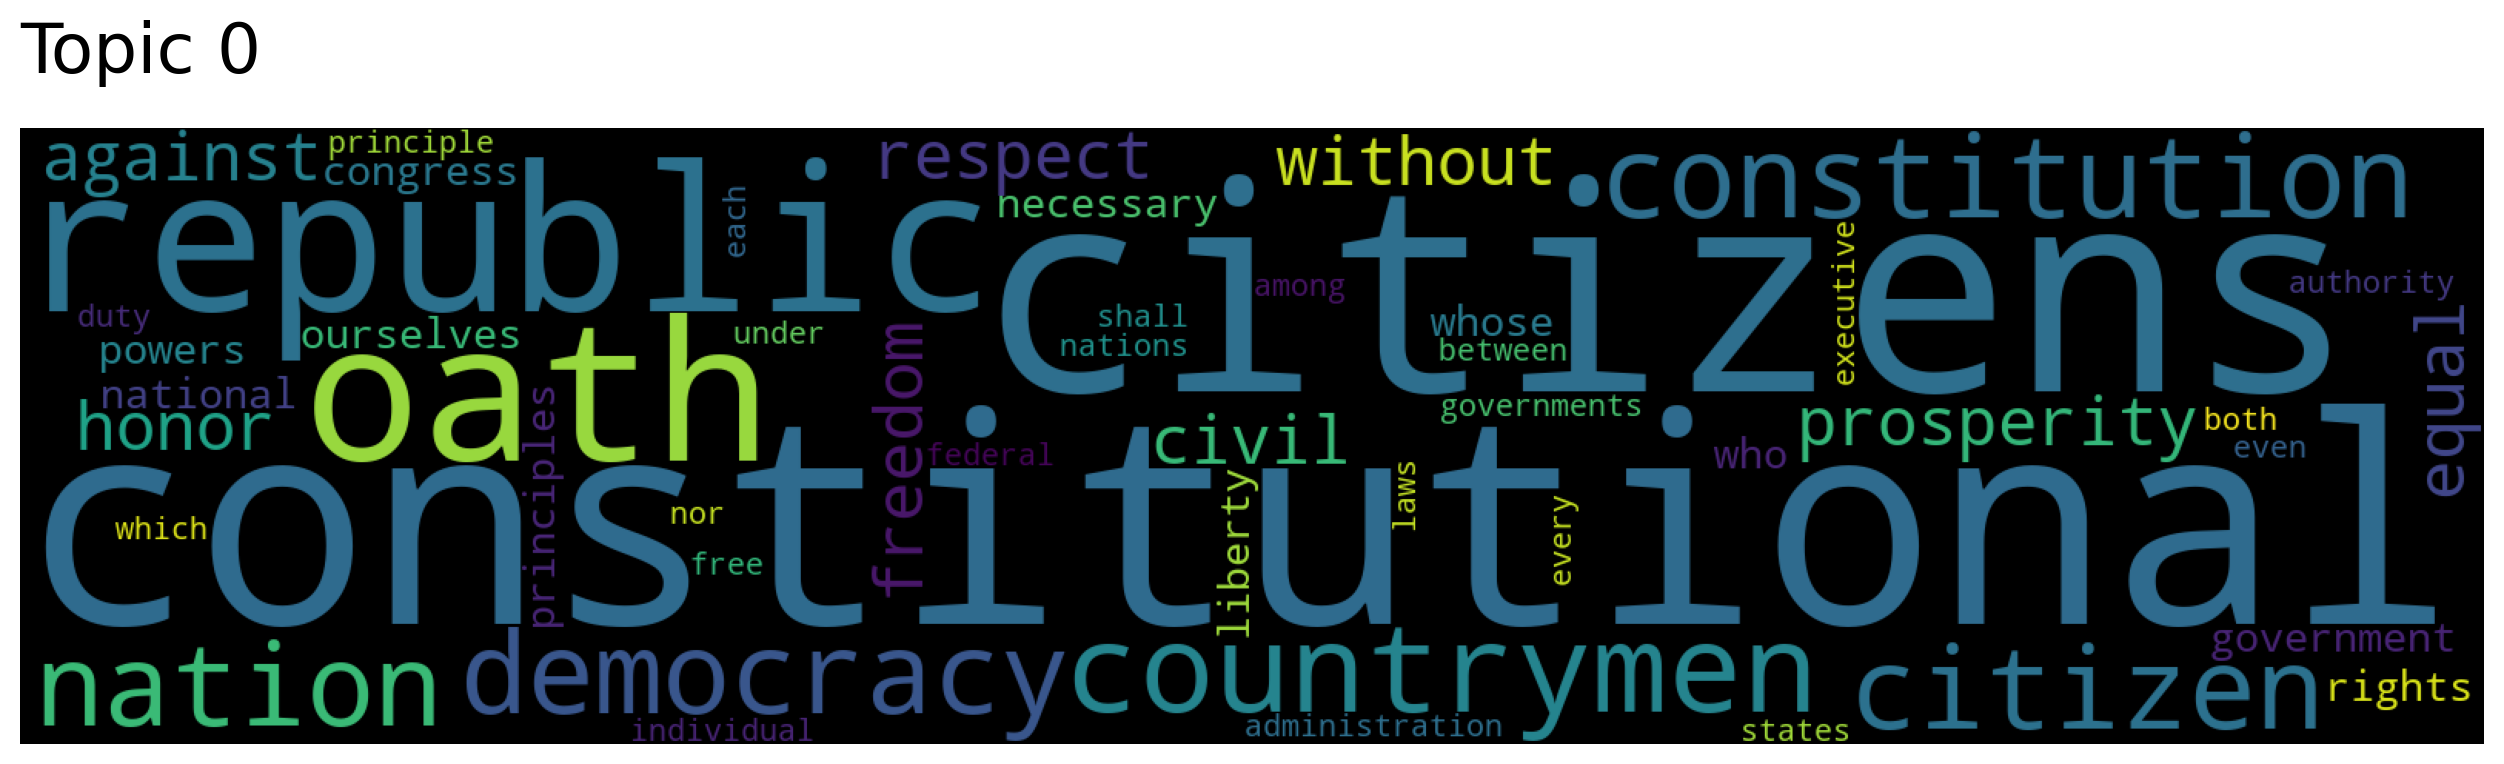

In [11]:
model.generate_topic_wordcloud(0)

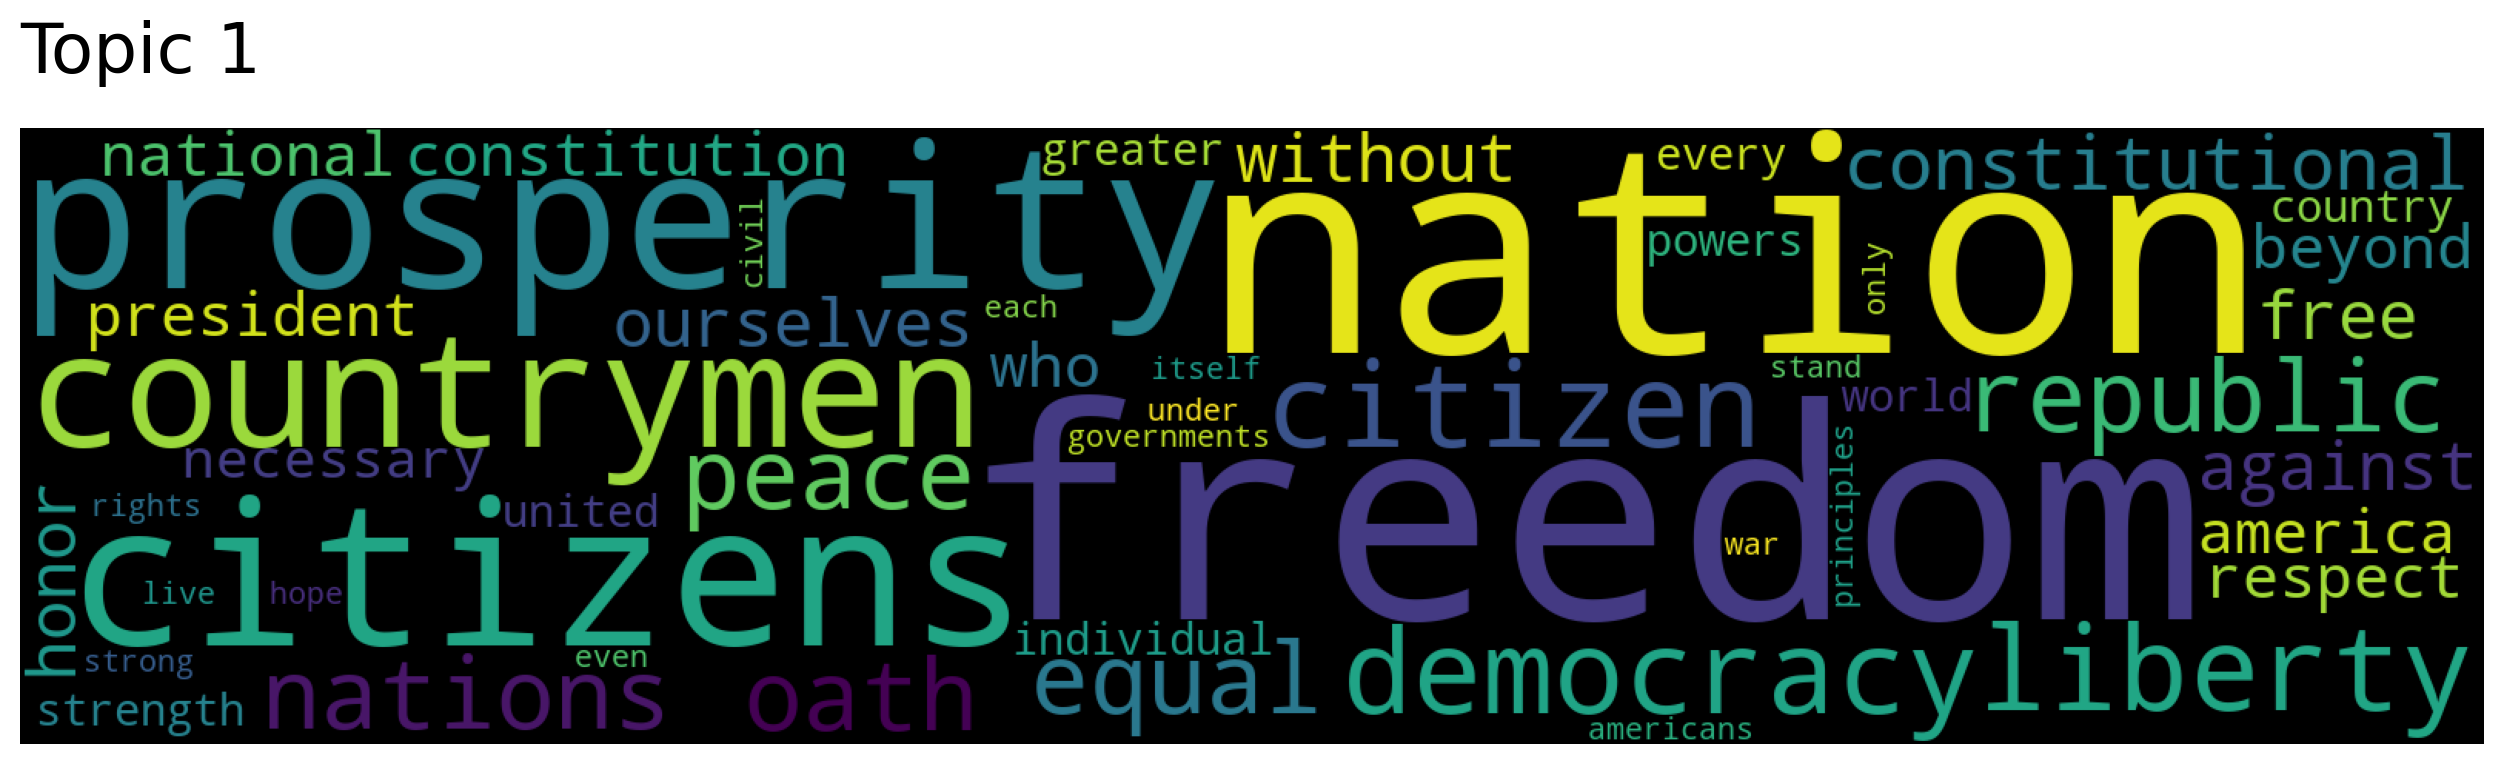

In [12]:
model.generate_topic_wordcloud(1)

## Search topics

In [13]:
# search the Topics by Keywords 
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["citizens"], num_topics=2)
print(f"No of topics : {len(topic_nums)} and words are {topic_words[0]}")

No of topics : 2 and words are ['constitutional' 'citizens' 'republic' 'oath' 'countrymen' 'democracy'
 'constitution' 'citizen' 'nation' 'prosperity' 'against' 'honor' 'civil'
 'respect' 'equal' 'without' 'freedom' 'government' 'congress' 'powers'
 'liberty' 'rights' 'principles' 'who' 'whose' 'ourselves' 'national'
 'necessary' 'governments' 'shall' 'duty' 'states' 'authority' 'principle'
 'even' 'nor' 'among' 'executive' 'individual' 'free' 'administration'
 'each' 'under' 'every' 'nations' 'both' 'federal' 'laws' 'between'
 'which']


In [14]:
# lets try to get the first topic 
model.get_topics(1)

(array([['constitutional', 'citizens', 'republic', 'oath', 'countrymen',
         'democracy', 'constitution', 'citizen', 'nation', 'prosperity',
         'against', 'honor', 'civil', 'respect', 'equal', 'without',
         'freedom', 'government', 'congress', 'powers', 'liberty',
         'rights', 'principles', 'who', 'whose', 'ourselves', 'national',
         'necessary', 'governments', 'shall', 'duty', 'states',
         'authority', 'principle', 'even', 'nor', 'among', 'executive',
         'individual', 'free', 'administration', 'each', 'under', 'every',
         'nations', 'both', 'federal', 'laws', 'between', 'which']],
       dtype='<U14'),
 array([[0.21458852, 0.19798893, 0.19109845, 0.18314603, 0.16819957,
         0.1600112 , 0.15490809, 0.15398127, 0.14915596, 0.12668046,
         0.12120382, 0.11470423, 0.11460052, 0.11454991, 0.11105031,
         0.1100403 , 0.10907139, 0.10694301, 0.10472932, 0.10471331,
         0.10167275, 0.10137184, 0.09703505, 0.09701145, 0.0946457

In [15]:
# gives the top 20 similarity of the words for the word "Constitutional"
words, word_scores = model.similar_words(keywords=["constitutional"], num_words=20)
for word, score in zip(words, word_scores):
  print (f"{word} {score}")

constitution 0.7288548908956042
citizen 0.47232910423119906
citizens 0.4502901919892479
oath 0.4308871938104223
government 0.4204031929610903
law 0.41521128341232183
rights 0.4150615550941384
congress 0.39239697956655206
democracy 0.3910433346509411
laws 0.37440227447432467
american 0.3704901556869522
president 0.36987780591743197
commerce 0.36866789670613775
states 0.36404274966869715
state 0.363117045594333
liberty 0.3607477880782548
foreign 0.35185554928744117
duties 0.35164760489677993
federal 0.35102678160694367
countrymen 0.35054170594180356


## New data

In [58]:
# New data
embedding_vector = model.embed(["I love people from Colombia"])
embedding_vector.shape

TensorShape([1, 512])

In [57]:
# Reduce number of topics
topic_mapping = model.hierarchical_topic_reduction(num_topics=1)
model.topic_words_reduced[0]

array(['citizens', 'republic', 'constitutional', 'countrymen',
       'democracy', 'oath', 'nation', 'citizen', 'prosperity', 'freedom',
       'constitution', 'liberty', 'against', 'equal', 'without', 'honor',
       'respect', 'ourselves', 'civil', 'who', 'powers', 'nations',
       'national', 'necessary', 'principles', 'free', 'peace', 'rights',
       'governments', 'government', 'whose', 'individual', 'congress',
       'shall', 'even', 'beyond', 'president', 'every', 'nor', 'each',
       'states', 'under', 'duty', 'both', 'principle', 'strength',
       'greater', 'among', 'itself', 'country'], dtype='<U14')

## Save  and load the model

In [54]:
""" # Save model
model.save("filename")


# Load model
model = Top2Vec.load("filename") """

' # Save model\nmodel.save("filename")\n\n\n# Load model\nmodel = Top2Vec.load("filename") '